# database schema


In [1]:
from IPython.display import Image, display

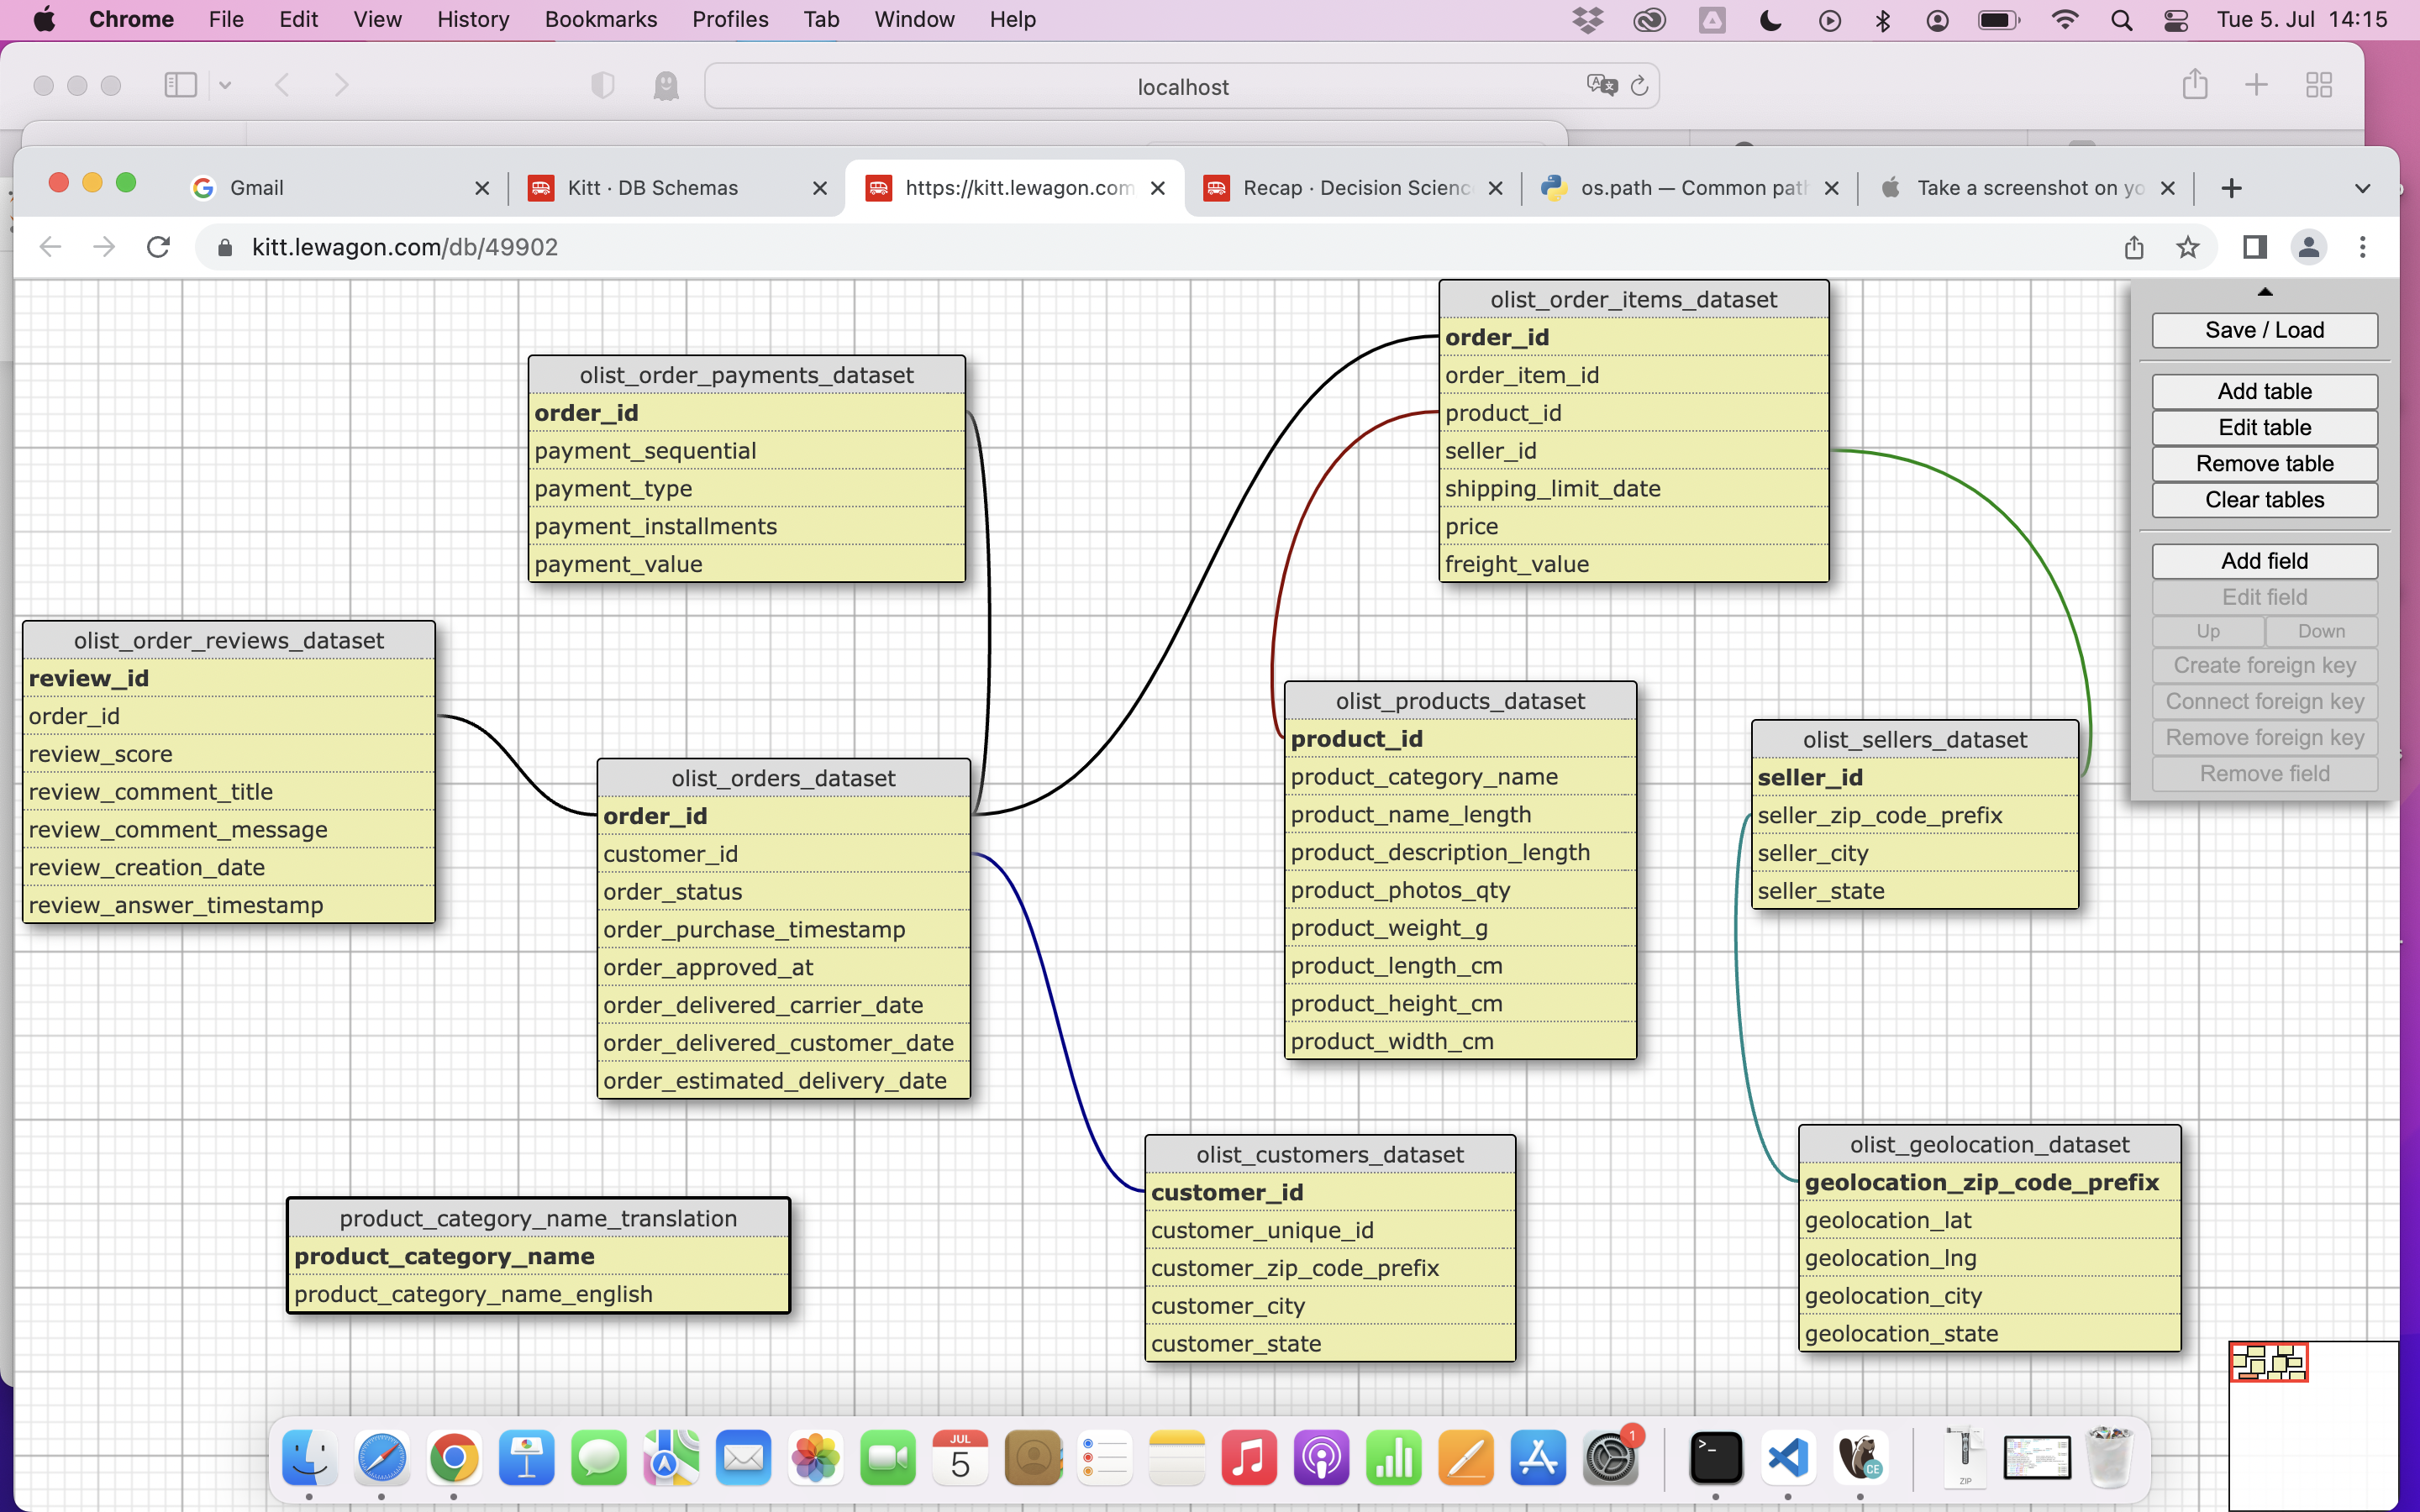

In [2]:
display(Image(filename='/Users/shreetamakarmakar/Desktop/le wagon/Olist_personal_project/DB_schema.png'))


# short description of the task in English

In [3]:
# Rule of the game: 
#one order (corresponding to an order id) may have more than one sellers and more than one payments


# 1. take order payments dataset
# 2. group by order id (since one order may have multiple payments) and sum
##this table has no timestamp. So we need more info:

#3. merge the grouped payments table with orders dataset
#4. sum payment_value for weeks (order_approved_at)
#5. plot and enjoy :)

# importing and merging datasets

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from olist.data import Olist
from datetime import date, datetime

In [5]:
olist = Olist()
data_dict = olist.get_data()

In [6]:
data = data_dict['order_payments'].groupby('order_id').sum()\
.merge(data_dict['orders'], on = 'order_id')\
.query("order_status == 'delivered'")[['order_id', 'payment_value', 'order_approved_at']] # only delivered stuff
data.head()

,order_id,payment_value,order_approved_at
0,00010242fe8c5a6d1ba2dd792cb16214,72.19,2017-09-13 09:45:35
1,00018f77f2f0320c557190d7a144bdd3,259.83,2017-04-26 11:05:13
2,000229ec398224ef6ca0657da4fc703e,216.87,2018-01-14 14:48:30
3,00024acbcdf0a6daa1e931b038114c75,25.78,2018-08-08 10:10:18
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04,2017-02-04 14:10:13


# conversion to datetime and plotting

In [7]:
# convert order_approved_at to datetime
# order_approved_at is an object now
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96477 entries, 0 to 99439
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_id           96477 non-null  object 
 1   payment_value      96477 non-null  float64
 2   order_approved_at  96463 non-null  object 
dtypes: float64(1), object(2)
memory usage: 2.9+ MB


In [8]:
data['order_approved_at'] = pd.to_datetime(data['order_approved_at'])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96477 entries, 0 to 99439
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_id           96477 non-null  object        
 1   payment_value      96477 non-null  float64       
 2   order_approved_at  96463 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 2.9+ MB


In [10]:
# setting datetime column as index for ease of plotting
data.set_index('order_approved_at', inplace = True)
data.head()

,order_id,payment_value
order_approved_at,,
2017-09-13 09:45:35,00010242fe8c5a6d1ba2dd792cb16214,72.19
2017-04-26 11:05:13,00018f77f2f0320c557190d7a144bdd3,259.83
2018-01-14 14:48:30,000229ec398224ef6ca0657da4fc703e,216.87
2018-08-08 10:10:18,00024acbcdf0a6daa1e931b038114c75,25.78
2017-02-04 14:10:13,00042b26cf59d7ce69dfabb4e55b4fd9,218.04


<AxesSubplot:xlabel='order_approved_at'>

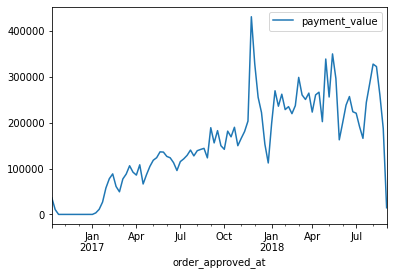

In [12]:
# now that the index is set, we can resample for every week (or month, or even year):
# ressample is a groupby function, so we can use an aggregate function along with it
data.resample('W').sum().plot() #uses pd.DataFrame.plot function